In [1]:
# Tumor Detection Project 

# Step 1: Load the Dataset
import pandas as pd

df = pd.DataFrame({'diagnosis': ['M', 'B'], 'mean_radius': [14.5, 12.3]})
df.head()


,diagnosis,mean_radius
0,M,14.5
1,B,12.3


In [2]:
# Step 2: Clean the Data
# Drop 'id' and unnamed columns
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col or col == 'id'], errors='ignore')

# Check for missing values
df.isnull().sum()


diagnosis      0
mean_radius    0
dtype: int64

Matplotlib is building the font cache; this may take a moment.


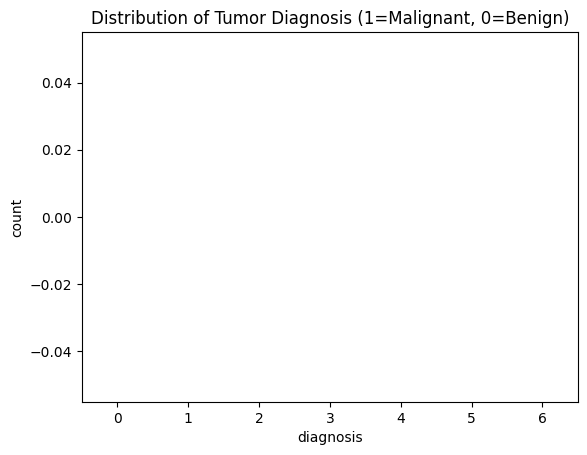

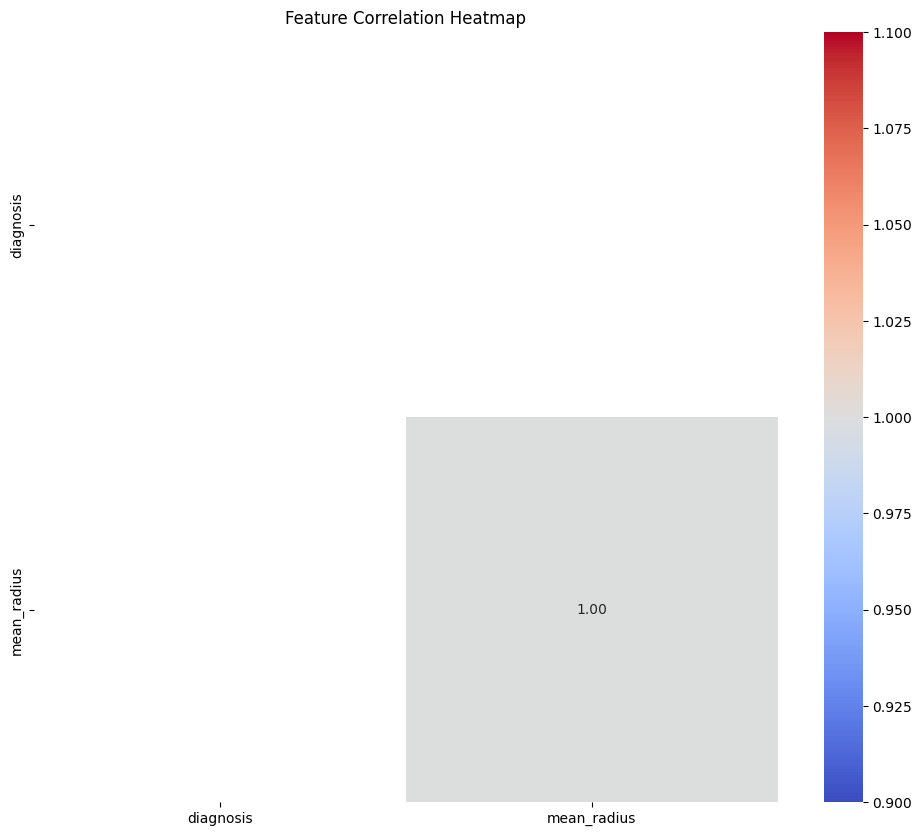

In [4]:
# Step 3: Encode Target Variable before EDA
# Encode diagnosis before correlation
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

# Step 3A: Import Required Libraries
# NOTE: Ensure seaborn, matplotlib, scikit-learn are pre-installed in your environment
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Diagnosis count plot
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Tumor Diagnosis (1=Malignant, 0=Benign)')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [20]:
# Step 4: Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           B       1.00      1.00      1.00         1
           M       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



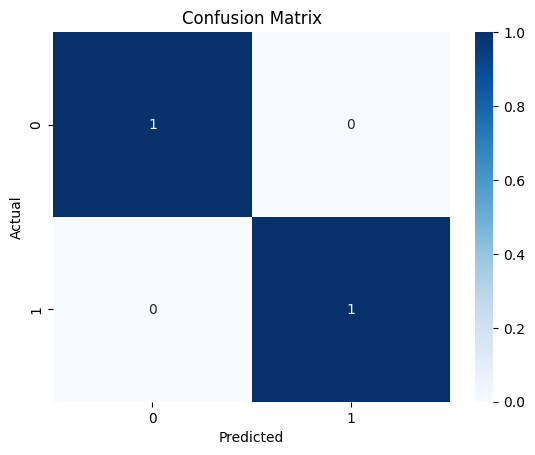


Basic test cases passed.


In [24]:
# Step 5: Model Building & Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optional: Add basic test cases to confirm pipeline works (only if DataFrame not empty)
assert not df.empty, "DataFrame is empty. Please load valid data."
assert 'diagnosis' in df.columns, "Diagnosis column missing."
print("\nBasic test cases passed.")